Import the required packages with their customary aliases as follows:

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Use the %matplotlib inline magic command so that your plots show in the notebook without having to call plt.show() every time.

In [2]:
%matplotlib inline

Using the pandas read_csv() method, read the GDP dataset into your notebook as a DataFrame called gdp_df. Take a look at the first 6 rows.

In [3]:
gdp_df = pd.read_csv("../Data/gdp_percapita.csv", nrows=6868)
gdp_df.head(6)

,Country or Area,Year,Value,Value Footnotes
0,Afghanistan,2019,2065.036398,NaN
1,Afghanistan,2018,2033.779002,NaN
2,Afghanistan,2017,2058.383832,NaN
3,Afghanistan,2016,2057.062164,NaN
4,Afghanistan,2015,2068.265904,NaN
5,Afghanistan,2014,2102.385234,NaN


Repeat for the internet use dataset. Call this DataFrame internet_df. Take a look at the first six rows.

In [4]:
internet_df = pd.read_csv("../Data/internet_use.csv", nrows=4495)
internet_df.head(6)

,Country or Area,Year,Value,Value Footnotes
0,Afghanistan,2014,6.390000,NaN
1,Afghanistan,2013,5.900000,NaN
2,Afghanistan,2012,5.454545,NaN
3,Afghanistan,2011,5.000000,NaN
4,Afghanistan,2010,4.000000,NaN
5,Afghanistan,2009,3.550000,NaN


Look at the shape of each DataFrame - how many rows? How many columns?

In [5]:
gdp_df.shape

(6868, 4)

In [6]:
internet_df.shape

(4495, 4)

Take a look at the datatypes for the columns in each DataFrame.

In [7]:
gdp_df.dtypes

Country or Area     object
Year                 int64
Value              float64
Value Footnotes    float64
dtype: object

In [8]:
internet_df.dtypes

Country or Area     object
Year                 int64
Value              float64
Value Footnotes    float64
dtype: object

Take a look at the last 10 rows of each DataFrame in turn.

In [9]:
gdp_df.tail(10)

,Country or Area,Year,Value,Value Footnotes
6858,Zimbabwe,1999,3600.849291,NaN
6859,Zimbabwe,1998,3653.920016,NaN
6860,Zimbabwe,1997,3580.048793,NaN
6861,Zimbabwe,1996,3520.430146,NaN
6862,Zimbabwe,1995,3226.413930,NaN
6863,Zimbabwe,1994,3263.934978,NaN
6864,Zimbabwe,1993,3033.504852,NaN
6865,Zimbabwe,1992,3054.889178,NaN
6866,Zimbabwe,1991,3426.598094,NaN
6867,Zimbabwe,1990,3324.348171,NaN


In [10]:
internet_df.tail(10)

,Country or Area,Year,Value,Value Footnotes
4485,Zimbabwe,2002,3.994356,NaN
4486,Zimbabwe,2001,0.799846,NaN
4487,Zimbabwe,2000,0.401434,NaN
4488,Zimbabwe,1999,0.161676,NaN
4489,Zimbabwe,1998,0.081648,NaN
4490,Zimbabwe,1997,0.033080,NaN
4491,Zimbabwe,1996,0.016790,NaN
4492,Zimbabwe,1995,0.007684,NaN
4493,Zimbabwe,1994,0.001739,NaN
4494,Zimbabwe,1990,0.000000,NaN


Drop the value footnotes column from both DataFrames. Check that this worked as expected.

In [11]:
gdp_df = gdp_df.drop(['Value Footnotes'], axis=1)

In [12]:
internet_df = internet_df.drop(['Value Footnotes'], axis=1)

Change the columns for the GDP Per Capita DataFrame to ‘Country’, ‘Year’, and ‘GDP_Per_Capita’.

In [13]:
gdp_df = gdp_df.rename(columns={'Country or Area': 'Country', 'Value': 'GDP_Per_Capita'})

Change the columns for the Internet Users DataFrame to ‘Country’, ‘Year’, and ‘Internet_Users_Pct’.

In [14]:
internet_df = internet_df.rename(columns={'Country or Area': 'Country', 'Value': 'Internet_Users_Pct'})

Merge the two DataFrames to one. Merge all rows from each of the two DataFrames. Call the new DataFrame gdp_and_internet_use.

In [15]:
gdp_df.head()

,Country,Year,GDP_Per_Capita
0,Afghanistan,2019,2065.036398
1,Afghanistan,2018,2033.779002
2,Afghanistan,2017,2058.383832
3,Afghanistan,2016,2057.062164
4,Afghanistan,2015,2068.265904


In [16]:
internet_df.head()

,Country,Year,Internet_Users_Pct
0,Afghanistan,2014,6.390000
1,Afghanistan,2013,5.900000
2,Afghanistan,2012,5.454545
3,Afghanistan,2011,5.000000
4,Afghanistan,2010,4.000000


In [17]:
gdp_and_internet_use = pd.merge(gdp_df, internet_df, how="outer", on=["Country", "Year"])

In [18]:
gdp_and_internet_use.shape

(7905, 4)

Look at the first five rows of your new DataFrame to confirm it merged correctly.

In [19]:
gdp_and_internet_use.head()

,Country,Year,GDP_Per_Capita,Internet_Users_Pct
0,Afghanistan,2019,2065.036398,NaN
1,Afghanistan,2018,2033.779002,NaN
2,Afghanistan,2017,2058.383832,NaN
3,Afghanistan,2016,2057.062164,NaN
4,Afghanistan,2015,2068.265904,NaN


Look at the last five rows to make sure the data is clean and as expected.

In [20]:
gdp_and_internet_use.tail()

,Country,Year,GDP_Per_Capita,Internet_Users_Pct
7900,Yemen,1999,NaN,0.056629
7901,Yemen,1998,NaN,0.023323
7902,Yemen,1997,NaN,0.015025
7903,Yemen,1996,NaN,0.000621
7904,Yemen,1990,NaN,0.000000


Subset the combined DataFrame to keep only the data for 2004, 2009, and 2014. Check that this happened correctly.

In [21]:
gdp_and_internet_use = gdp_and_internet_use[gdp_and_internet_use["Year"].isin([2004, 2009, 2014])]

In [22]:
gdp_and_internet_use.head(25)

,Country,Year,GDP_Per_Capita,Internet_Users_Pct
5,Afghanistan,2014,2102.385234,6.390000
10,Afghanistan,2009,1758.904043,3.550000
15,Afghanistan,2004,1200.278256,0.105809
23,Albania,2014,11623.866679,60.100000
28,Albania,2009,10346.864199,41.200000
33,Albania,2004,7604.838002,2.420388
53,Algeria,2014,11512.705405,18.090000
58,Algeria,2009,10782.361398,11.230000
63,Algeria,2004,10058.435939,4.634475
83,Angola,2014,8239.828837,21.260000


Create three new DataFrames, one for 2004, one for 2009, and one for 2014. Give them meaningful names that aren't too long.

In [23]:
gdp_internet2004 = gdp_and_internet_use[gdp_and_internet_use["Year"].isin([2004])]

In [24]:
gdp_internet2004.head(25)

,Country,Year,GDP_Per_Capita,Internet_Users_Pct
15,Afghanistan,2004,1200.278256,0.105809
33,Albania,2004,7604.838002,2.420388
63,Algeria,2004,10058.435939,4.634475
93,Angola,2004,5593.241537,0.464815
123,Antigua and Barbuda,2004,18745.681534,24.266544
153,Arab World,2004,11742.589407,NaN
183,Argentina,2004,18032.610491,16.036684
213,Armenia,2004,6472.131214,4.899009
241,Aruba,2004,38984.218383,23.000000
271,Australia,2004,41578.498520,NaN


In [25]:
gdp_internet2009 = gdp_and_internet_use[gdp_and_internet_use["Year"].isin([2009])]

In [26]:
gdp_internet2009.head(25)

,Country,Year,GDP_Per_Capita,Internet_Users_Pct
10,Afghanistan,2009,1758.904043,3.55
28,Albania,2009,10346.864199,41.20
58,Algeria,2009,10782.361398,11.23
88,Angola,2009,7643.493749,6.00
118,Antigua and Barbuda,2009,20046.839017,42.00
148,Arab World,2009,13063.094140,NaN
178,Argentina,2009,21519.892554,34.00
208,Armenia,2009,9052.389818,15.30
236,Aruba,2009,35314.912883,58.00
266,Australia,2009,44910.450858,74.25


In [27]:
gdp_internet2014 = gdp_and_internet_use[gdp_and_internet_use["Year"].isin([2014])]

##gdp_internet2014 = gdp_and_internet_use[gdp_and_internet_use["Year"] == 2014] ##kevin's idea

In [28]:
gdp_internet2014.head(25)

,Country,Year,GDP_Per_Capita,Internet_Users_Pct
5,Afghanistan,2014,2102.385234,6.39000
23,Albania,2014,11623.866679,60.10000
53,Algeria,2014,11512.705405,18.09000
83,Angola,2014,8239.828837,21.26000
113,Antigua and Barbuda,2014,18104.241470,64.00000
143,Arab World,2014,14219.562395,NaN
173,Argentina,2014,23550.099061,64.70000
203,Armenia,2014,11019.838785,46.30000
231,Aruba,2014,35458.608343,83.78000
261,Australia,2014,47436.748390,84.56000


Which country had the highest percentage of internet users in 2014? What was the percentage? (Try typing the first 3 letters of your DataFrame name and hitting the tab key for auto-complete options).

In [29]:
print(gdp_internet2014[gdp_internet2014['Internet_Users_Pct']==gdp_internet2014['Internet_Users_Pct'].max()])

      Country  Year  GDP_Per_Capita  Internet_Users_Pct
2625  Iceland  2014      49652.1495               98.16


Which country had the lowest percentage of internet users in 2014? What was the percentage?

In [30]:
print(gdp_internet2014[gdp_internet2014['Internet_Users_Pct']==gdp_internet2014['Internet_Users_Pct'].min()])

                          Country  Year  GDP_Per_Capita  Internet_Users_Pct
7079  Dem. People's Rep. of Korea  2014             NaN                 0.0


Repeat for 2004 and 2009.

In [31]:
print(gdp_internet2004[gdp_internet2004['Internet_Users_Pct']==gdp_internet2004['Internet_Users_Pct'].max()])

     Country  Year  GDP_Per_Capita  Internet_Users_Pct
6019  Sweden  2004    44496.023401               83.89


In [32]:
print(gdp_internet2004[gdp_internet2004['Internet_Users_Pct']==gdp_internet2004['Internet_Users_Pct'].min()])

                          Country  Year  GDP_Per_Capita  Internet_Users_Pct
7088  Dem. People's Rep. of Korea  2004             NaN                 0.0


In [33]:
print(gdp_internet2009[gdp_internet2009['Internet_Users_Pct']==gdp_internet2009['Internet_Users_Pct'].max()])

      Country  Year  GDP_Per_Capita  Internet_Users_Pct
2630  Iceland  2009    48177.084123                93.0


In [34]:
print(gdp_internet2009[gdp_internet2009['Internet_Users_Pct']==gdp_internet2009['Internet_Users_Pct'].min()])

                          Country  Year  GDP_Per_Capita  Internet_Users_Pct
7083  Dem. People's Rep. of Korea  2009             NaN                 0.0


In [35]:
print(gdp_internet2009['Internet_Users_Pct'].min()) #find a single value

0.0


Which country had the highest gdp per capita in 2014? What was the gdp per capita?

In [36]:
print(gdp_internet2014[gdp_internet2014['GDP_Per_Capita']==gdp_internet2014['GDP_Per_Capita'].max()])

               Country  Year  GDP_Per_Capita  Internet_Users_Pct
3721  Macao SAR, China  2014    156514.13385                 NaN


Which country had the lowest gdp per capita in 2014? What was the gdp per capita?

In [37]:
print(gdp_internet2014[gdp_internet2014['GDP_Per_Capita']==gdp_internet2014['GDP_Per_Capita'].min()])

                       Country  Year  GDP_Per_Capita  Internet_Users_Pct
1047  Central African Republic  2014      822.610458                 NaN


Create some scatterplots:

a. 2004 Percent Using the Internet vs GDP Per Capita

b. 2009 Percent Using the Internet vs GDP Per Capita

c. 2014 Percent Using the Internet vs GDP Per Capita

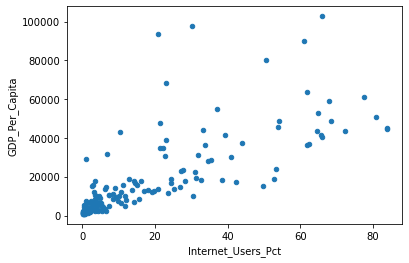

In [38]:
gdp_internet2004.plot(
   x='Internet_Users_Pct', 
   y='GDP_Per_Capita', 
   kind='scatter'
)

plt.show()

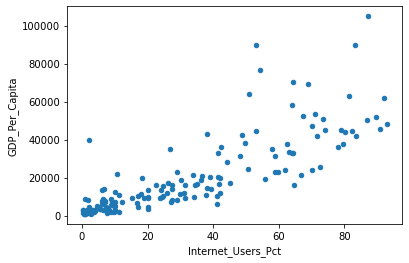

In [39]:
gdp_internet2009.plot(
   x='Internet_Users_Pct', 
   y='GDP_Per_Capita', 
   kind='scatter'
)

plt.show()

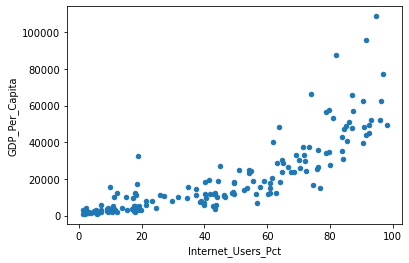

In [40]:
gdp_internet2014.plot(
   x='Internet_Users_Pct', 
   y='GDP_Per_Capita', 
   kind='scatter'
)

plt.show()

Are there differences across years? What do the plots tell you about any relationship between these two variables? Enter your observations as a markdown cell.

In [41]:
# Higher GDP yields higher internet usage. 

Look at the distribution of gdp per capita values for 2014. Is it unimodal?

#unimodal - one clear peak - see below 

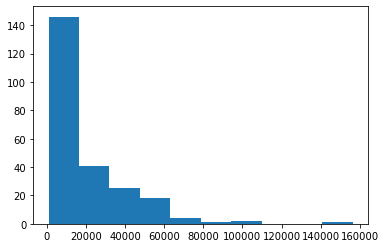

In [42]:
x = gdp_internet2014.GDP_Per_Capita

plt.hist(x,10)

plt.show()

Look at the distribution of Internet Use for 2014. Is it unimodal?

#bimodal - multiple peaks - see below 

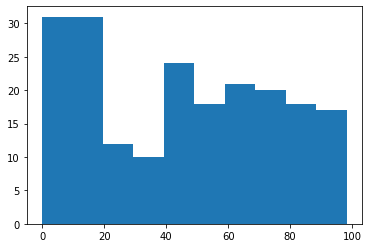

In [43]:
x = gdp_internet2014.Internet_Users_Pct

plt.hist(x,10)

plt.show()

What are the top 5 countries in terms of internet use in 2014?

In [44]:
gdp_internet2014.nlargest(5,'Internet_Users_Pct')

,Country,Year,GDP_Per_Capita,Internet_Users_Pct
2625,Iceland,2014,49652.149500,98.16
561,Bermuda,2014,77361.104881,96.80
4648,Norway,2014,62589.373548,96.30
1452,Denmark,2014,52214.537753,95.99
6871,Andorra,2014,NaN,95.90


Create a DataFrame called top_5_internet from the combined DataFrame that has all three years for the 5 countries that had the greatest 2014 internet usage. You should have 15 rows. Check that this is true.

In [46]:
top_5_internet = gdp_and_internet_use[gdp_and_internet_use["Country"].isin(["Iceland", "Bermuda", "Norway", "Denmark", "Andorra"]) & gdp_and_internet_use["Year"].isin([2004, 2009, 2014])]
print(top_5_internet)

      Country  Year  GDP_Per_Capita  Internet_Users_Pct
561   Bermuda  2014    77361.104881           96.800000
566   Bermuda  2009    89961.982744           83.250000
571   Bermuda  2004    90195.811033           60.990867
1452  Denmark  2014    52214.537753           95.990000
1457  Denmark  2009    50274.075696           86.840000
1462  Denmark  2004    50607.628971           80.930000
2625  Iceland  2014    49652.149500           98.160000
2630  Iceland  2009    48177.084123           93.000000
2635  Iceland  2004    45145.545658           83.880000
4648   Norway  2014    62589.373548           96.300000
4653   Norway  2009    61886.564498           92.080000
4658   Norway  2004    60893.410993           77.690000
6871  Andorra  2014             NaN           95.900000
6876  Andorra  2009             NaN           78.530000
6881  Andorra  2004             NaN           26.837954


Create a seaborn FacetGrid to show the internet usage trend across the years 2004, 2009, and 2014 for these 5 countries (those with the highest reported internet use in 2014). Which country had the greatest growth between 2004 and 2014?

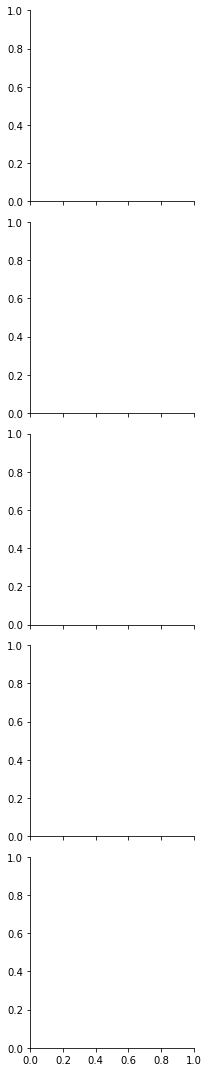

In [70]:
sns.FacetGrid(top_5_internet, row='Country')

Repeat the steps above to look at the trend for the 5 countries with the lowest 2014 internet usage. Which country has consistently had the least internet use?